In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import joblib

from scipy import stats 
from scipy.interpolate import make_interp_spline
import seaborn as sns
import matplotlib.pyplot as plt

#Norhan
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn.ensemble import HistGradientBoostingRegressor
import lightgbm as ltb

#Mohammed
from sklearn import linear_model
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import PoissonRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

#Ahmed
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

#Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time
import joblib
import warnings
warnings.filterwarnings("ignore")

# **Load Data**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Deep_learning/one_hot_encoded_dataset.csv')
dataset.head()

,type,flight_month,num_of_hours_taken,num_of_stops,distance_between_2_cities,formatted_price,airline_Air India,airline_Indigo,airline_Other_airline,airline_Vistara,...,week_day_of_flight_Thursday,week_day_of_flight_Tuesday,dep_time_Afternoon,dep_time_Early morning,dep_time_Evening,dep_time_Morning,arr_time_Afternoon,arr_time_Early morning,arr_time_Evening,arr_time_Morning
0,0,2,2,0,0.653497,5956,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,2,10,1,0.985014,7423,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,2,11,1,0.985014,21343,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,0,2,7,1,0.985014,7423,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,0,2,14,1,0.985014,21343,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


# **Spliting the Dataset**

In [ ]:
y_train = dataset['formatted_price'][:192167]
y_test = dataset['formatted_price'][192167:]

dataset.drop(columns=['formatted_price'],axis=1,inplace=True)

x_train = dataset[:192167]
x_test = dataset[192167:]

# **Visualization**

In [ ]:
def compare_orgin_predict(y_test,y_pred,N=40):
  x_ax = range(len(y_test[:N]))
  plt.plot(x_ax, y_test[:N], label="original")
  plt.plot(x_ax, y_pred[:N], label="predicted")
  plt.title("Flight Price test and predicted data")
  plt.xlabel('Observation Number')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

# **Modeling**

In [ ]:
models = {
    #Norhan
    "XGBR": XGBRegressor(),
    "PR"  : linear_model.PoissonRegressor(),
    "HGBR": HistGradientBoostingRegressor(),
    "LGBMR": ltb.LGBMRegressor(),
    #Mohammed
    "LR": linear_model.LinearRegression(),
    "GBR": ensemble.GradientBoostingRegressor(),
    "ETR": ensemble.ExtraTreesRegressor(),
    # "KNNR": KNeighborsRegressor(),
    #Ahmed
    "BR": BaggingRegressor(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor()   
}

Using model: XGBR
[21:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time: 15.565896059999998
Training Score: 0.9456754711069374
Test Score: 0.9616563628557725
r2_score: 0.9616563628557725
MSE: 19727214.36226516
RMSE: 4441.53288429402
MAE: 2619.5927348162118
----------------------------------------


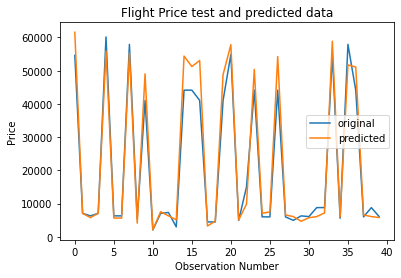

----------------------------------------
Using model: PR
Time: 7.335105274
Training Score: 0.9298150547960874
Test Score: 0.9481320923075969
r2_score: 0.9401960998023221
MSE: 30768191.198489662
RMSE: 5546.908255820504
MAE: 3664.9992290776236
----------------------------------------


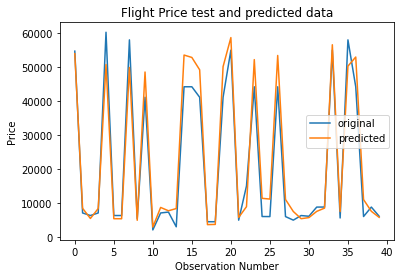

----------------------------------------
Using model: HGBR
Time: 6.255983795000002
Training Score: 0.9588917209407867
Test Score: 0.9732110713553477
r2_score: 0.9732110713553477
MSE: 13782493.71390271
RMSE: 3712.478109551989
MAE: 2141.168372890967
----------------------------------------


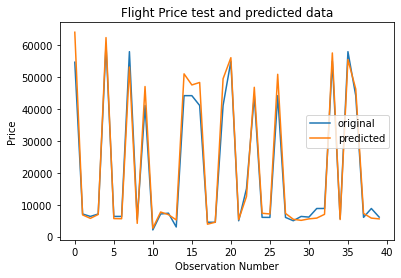

----------------------------------------
Using model: LGBMR
Time: 1.6897998629999975
Training Score: 0.9589878935349271
Test Score: 0.9732792922463025
r2_score: 0.9732792922463025
MSE: 13747395.109803468
RMSE: 3707.747983588349
MAE: 2140.298601087634
----------------------------------------


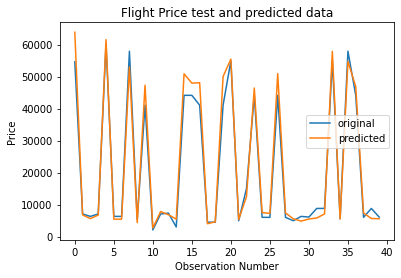

----------------------------------------
Using model: LR
Time: 0.3454108330000025
Training Score: 0.9044604001743708
Test Score: 0.9217202499406854
r2_score: 0.9217202499406854
MSE: 40273733.13168121
RMSE: 6346.158927389166
MAE: 4239.982172600458
----------------------------------------


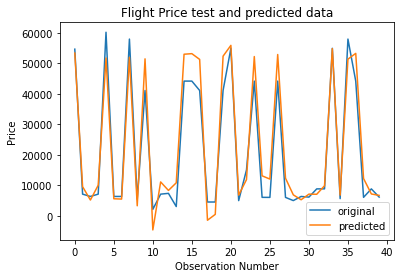

----------------------------------------
Using model: GBR
Time: 17.935503381000004
Training Score: 0.9455297550851589
Test Score: 0.9615242558985949
r2_score: 0.9615242558985949
MSE: 19795181.369494658
RMSE: 4449.177605973339
MAE: 2630.2836719566
----------------------------------------


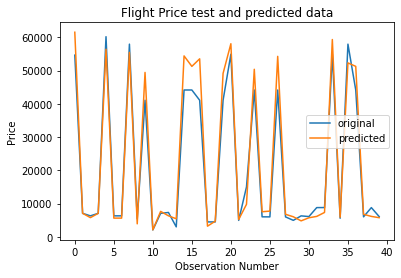

----------------------------------------
Using model: ETR
Time: 63.786648242999995
Training Score: 0.9805101699917644
Test Score: 0.979826020145162
r2_score: 0.979826020145162
MSE: 10379203.820426377
RMSE: 3221.6771750792127
MAE: 1400.2086494368716
----------------------------------------


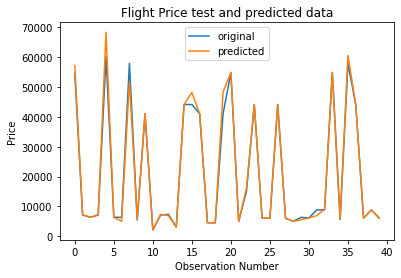

----------------------------------------
Using model: BR
Time: 5.521705600000018
Training Score: 0.9791860087015749
Test Score: 0.979773062969726
r2_score: 0.979773062969726
MSE: 10406449.476541746
RMSE: 3225.9028932287697
MAE: 1409.1831193557846
----------------------------------------


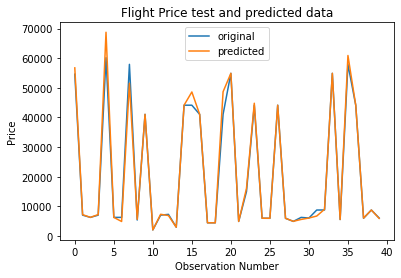

----------------------------------------
Using model: DT
Time: 0.8104202680000014
Training Score: 0.9805101880748418
Test Score: 0.9782758052831321
r2_score: 0.9782758052831321
MSE: 11176765.636896797
RMSE: 3343.167007030429
MAE: 1417.6697770346134
----------------------------------------


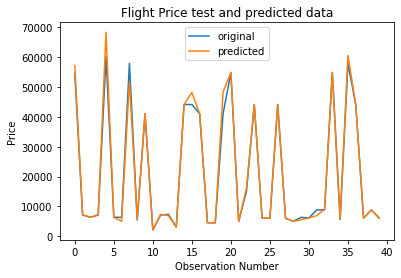

----------------------------------------
Using model: RF
Time: 53.39539039800002
Training Score: 0.9798909570012895
Test Score: 0.9803539064110107
r2_score: 0.9803539064110107
MSE: 10107614.417310452
RMSE: 3179.247460848314
MAE: 1401.5255322047467
----------------------------------------


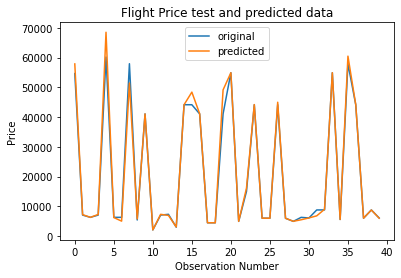

----------------------------------------


In [ ]:
for name, model in models.items():
    
    start = time.process_time()
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Time: {time.process_time() - start}')
    
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    
    y_pred = model.predict(x_test)
    joblib.dump(model, f'{name}.h5')
    print(f'r2_score: {r2_score(y_test,y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

    print('-'*40)
    compare_orgin_predict(y_test,y_pred)
    print('-'*40)




# **Simple Ensemble Techniques (Averaging)**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Deep_learning/one_hot_encoded_dataset.csv')
len(dataset)

240197

In [ ]:
y_train = dataset['formatted_price']
dataset.drop(columns=['formatted_price'],axis=1,inplace=True)
x_train = dataset[:]

In [ ]:
# We will use The best Models With high accuracy
Ensamble_models = {
    "HGBR": HistGradientBoostingRegressor(),
    "LGBMR": ltb.LGBMRegressor(),
    "ETR": ensemble.ExtraTreesRegressor(),
    "BR": BaggingRegressor(),
    "RF": RandomForestRegressor()  
}

In [ ]:
Ensemble_accuracy = 0
Ensemble_training_score = 0 
Ensemble_testing_score = 0
Ensemble_MSE = 0


for name, model in Ensamble_models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    Ensemble_accuracy += r2_score(y_test,y_pred)
    Ensemble_training_score += model.score(x_train, y_train) 
    Ensemble_testing_score += model.score(x_test, y_test)
    Ensemble_MSE += mean_squared_error(y_test, y_pred)

Ensemble_accuracy /= 5
Ensemble_training_score /= 5 
Ensemble_testing_score /= 5
Ensemble_MSE /= 5


print(f'Ensemble_accuracy: {Ensemble_accuracy}')
print(f'Ensemble_training_score: {Ensemble_training_score}')
print(f'Ensemble_testing_score: {Ensemble_testing_score}')
print(f'Ensemble_MSE: {Ensemble_MSE}')

Ensemble_accuracy: 0.9824913367238679
Ensemble_training_score: 0.9736073193790409
Ensemble_testing_score: 0.9824913367238679
Ensemble_MSE: 9007939.240239136


In [ ]:
joblib.dump(model, 'EnsembleRegressor.h5')

['EnsembleRegressor.h5']